<a href="https://colab.research.google.com/github/cmason30/python-practice/blob/master/regression_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [0]:
df = pd.read_csv("USA_Housing.csv")

In [0]:
df.head()

In [0]:
df.info()

In [0]:
df.describe()

In [0]:
sns.pairplot(df)

In [0]:
sns.distplot(df["Price"])

In [0]:
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [0]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [0]:
import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
# test_size is how much data you want to allocate to test size
# random_state gives a specific seed


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lm.intercept_)

-2640159.796853739


In [16]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [17]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [18]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])


,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [0]:
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
# PART 2

In [0]:
predictions = lm.predict(X_test)
predictions

In [22]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

In [0]:
plt.scatter(y_test, predictions)

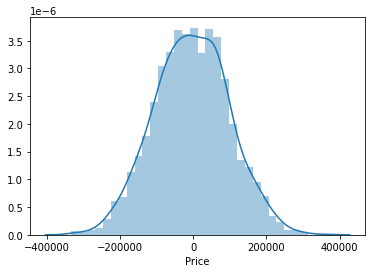

In [25]:
sns.distplot((y_test-predictions))

In [0]:
from sklearn import metrics

In [27]:
metrics.mean_absolute_error(y_test, predictions)


82288.22251914928

In [28]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208244

In [29]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290538